<a href="https://colab.research.google.com/github/satanimeet/customerchurn/blob/main/telecom_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text
import seaborn as sns

In [ ]:
from google.colab import drive


In [ ]:
path = ("/content/drive/MyDrive/dataset/customer_churn.csv")
olddata = pd.read_csv(path)
olddata.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
olddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
olddata.shape

(7043, 21)

In [ ]:
olddata.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


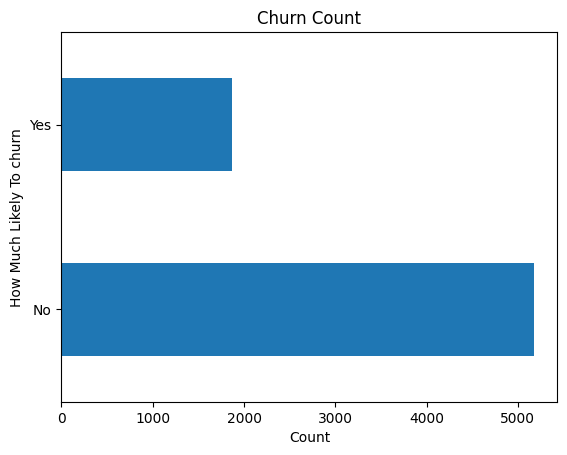

In [ ]:
olddata['Churn'].value_counts().plot(kind='barh')
plt.xlabel("Count")
plt.ylabel("How Much Likely To churn")
plt.title("Churn Count")
plt.show()

In [ ]:
total_customers = len(olddata)
churned_customers = len(olddata[olddata['Churn'] == 'Yes'])
churn_percentage = (churned_customers / total_customers) * 100

print(f"Total Customers: {total_customers}")
print(f"Churned Customers: {churned_customers}")
print(f"Churn Percentage: {churn_percentage:.2f}%")
print(f"NON Churn Percentage:  {100 - churn_percentage:.2f}%")

Total Customers: 7043
Churned Customers: 1869
Churn Percentage: 26.54%
NON Churn Percentage:  73.46%


In [ ]:

if 'gender' in olddata.columns:
    gender_counts = olddata['gender'].value_counts()
    print(gender_counts)

    total = len(olddata)
    male_ratio = gender_counts.get('Male', 0) / total
    female_ratio = gender_counts.get('Female', 0) / total

    print(f"\nGender Ratio:")
    print(f"Male: {male_ratio:.2%}")
    print(f"Female: {female_ratio:.2%}")
else:
    print("Error: 'gender' column not found in the DataFrame.")

gender
Male      3555
Female    3488
Name: count, dtype: int64

Gender Ratio:
Male: 50.48%
Female: 49.52%


In [ ]:
if 'SeniorCitizen' in olddata.columns and 'Churn' in olddata.columns:
    senior_citizens = olddata[olddata['SeniorCitizen'] == 1]
    male_senior_churners = senior_citizens[(senior_citizens['gender'] == 'Male') & (senior_citizens['Churn'] == 'Yes')]
    total_senior_citizens = len(senior_citizens)
    print(f"\nTotal Senior Citizens: {total_senior_citizens}")

    senior_gender_counts = senior_citizens['gender'].value_counts()
    print("\nSenior Citizen Gender Distribution:")
    print(senior_gender_counts)



    senior_churn_counts = senior_citizens['Churn'].value_counts(normalize=True) * 100
    print("\nChurn likelihood among Senior Citizens:")
    print(senior_churn_counts)
    totalcitizens_male_churner=len(senior_citizens[(senior_citizens['gender'] == 'Male') & (senior_citizens['Churn'] == 'Yes')])
    print(f"\nMale citizens Churner:- {totalcitizens_male_churner}")
    totalcitizens_Female_churner=len(senior_citizens[(senior_citizens['gender'] == 'Female') & (senior_citizens['Churn'] == 'Yes')])
    print(f"\nFemale citizens Churner:- {totalcitizens_Female_churner}")


else:
    print("Error")


Total Senior Citizens: 1142

Senior Citizen Gender Distribution:
gender
Male      574
Female    568
Name: count, dtype: int64

Churn likelihood among Senior Citizens:
Churn
No     58.318739
Yes    41.681261
Name: proportion, dtype: float64

Male citizens Churner:- 236

Female citizens Churner:- 240


In [ ]:
newdata = olddata.copy()

In [ ]:
newdata.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
newdata.drop(['customerID'],axis=1,inplace=True)

In [ ]:
def tenure_to_years(tenure):
    if 0 <= tenure <= 12:
        return '0-1'
    elif 13 <= tenure <= 24:
        return '1-2'
    elif 25 <= tenure <= 36:
        return '2-3'
    elif 37 <= tenure <= 48:
        return '3-4'
    elif 49 <= tenure <= 60:
        return '4-5'
    elif tenure > 60 :
        return '5+'
    else:
        return 'Unknown'

newdata['tenure_years'] = newdata['tenure'].apply(tenure_to_years)
newdata['tenure_years'].value_counts()

newdata.drop(['tenure'],axis=1,inplace=True)



In [ ]:
newdata['Churn'] = np.where(newdata['Churn'] == 'Yes', 1, 0)

In [ ]:
newdata['TotalCharges'] = pd.to_numeric(newdata['TotalCharges'], errors='coerce')
newdata['MonthlyCharges'] = pd.to_numeric(newdata['MonthlyCharges'], errors='coerce')
categorical_columns = [col for col in newdata.columns
                       if col not in ['TotalCharges','MonthlyCharges','Churn'] and newdata[col].dtype=='object']

newdata_dummies = pd.get_dummies(newdata, columns=categorical_columns, dtype='int')
newdata_dummies.head()


,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_years_0-1,tenure_years_1-2,tenure_years_2-3,tenure_years_3-4,tenure_years_4-5,tenure_years_5+
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


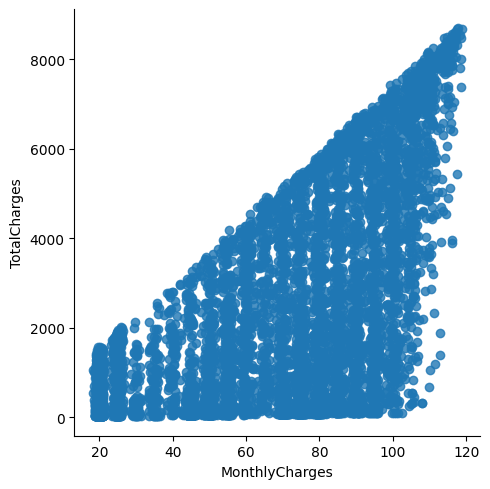

In [ ]:
sns.lmplot(data=newdata_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [ ]:

newdata_dummies.to_csv('filter_churn.csv', index=False)